In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('US_Accidents_June20.csv')

df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
dropColumns = ['ID','Country','End_Lat','End_Lng','Number','Side','Zipcode','Timezone','Airport_Code','Wind_Chill(F)','Precipitation(in)','Weather_Condition','Amenity','Bump','No_Exit','Station','Turning_Loop']
len(dropColumns)

17

In [9]:
df = df.drop(dropColumns, axis=1)

In [10]:
df.shape

(3513617, 32)

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Crossing                 0
Give_Way                 0
Junction                 0
Railway                  0
Roundabout               0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [12]:
df.shape

(2117314, 32)

In [13]:
df.to_csv(r'US_Accidents_June20_CLEANED.csv', index = True, header=True)

In [18]:
df[['Wind_Speed(mph)','Temperature(F)', 'Wind_Chill(F)']]

,Wind_Speed(mph),Temperature(F),Wind_Chill(F)
0,NaN,36.9,NaN
1,NaN,37.9,NaN
2,3.5,36.0,33.3
3,4.6,35.1,31.0
4,3.5,36.0,33.3
...,...,...,...
3513612,13.0,86.0,86.0
3513613,6.0,70.0,70.0
3513614,10.0,73.0,73.0
3513615,8.0,71.0,71.0


In [2]:
Ta=36.0
v=3.6

def windChill(Ta,v):
    return (35.74+(0.6215*Ta)) - (35.75*(v**0.16)) + (0.4275*Ta * (v**0.16))

windChill(Ta,v)

33.122853879604776

In [128]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('US_Accidents_June20_CLEANED.csv', low_memory=False)
df.head()

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Junction,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,False,True,Night,Night,Day,Day
1,3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,Night,Day,Day,Day
2,4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,False,True,Day,Day,Day,Day
3,5,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,6,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
numericData_lst=['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Severity']
df_Num=df[numericData_lst].copy()

In [4]:
df_Num.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Severity
0,0.01,36.0,100.0,29.67,10.0,3.5,2
1,0.01,35.1,96.0,29.64,9.0,4.6,3
2,0.01,36.0,89.0,29.65,6.0,3.5,2
3,0.01,37.9,97.0,29.63,7.0,3.5,3
4,0.00,34.0,100.0,29.66,7.0,3.5,2


In [4]:
df.isnull().sum()

Unnamed: 0               0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Crossing                 0
Give_Way                 0
Junction                 0
Railway                  0
Roundabout               0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

C:\Users\josrenca\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\josrenca\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


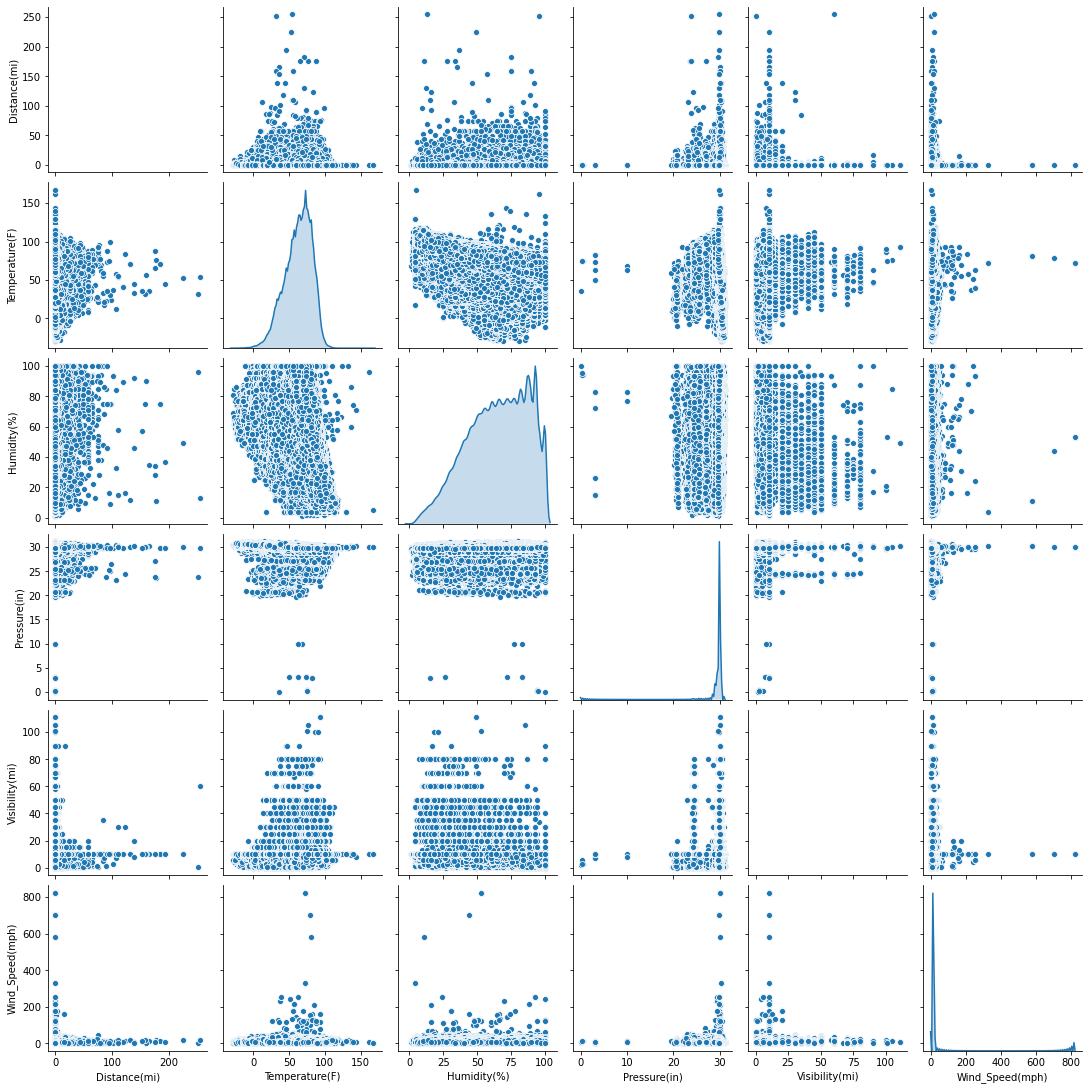

In [11]:
sns.pairplot(df_Num, diag_kind="kde")
plt.show()

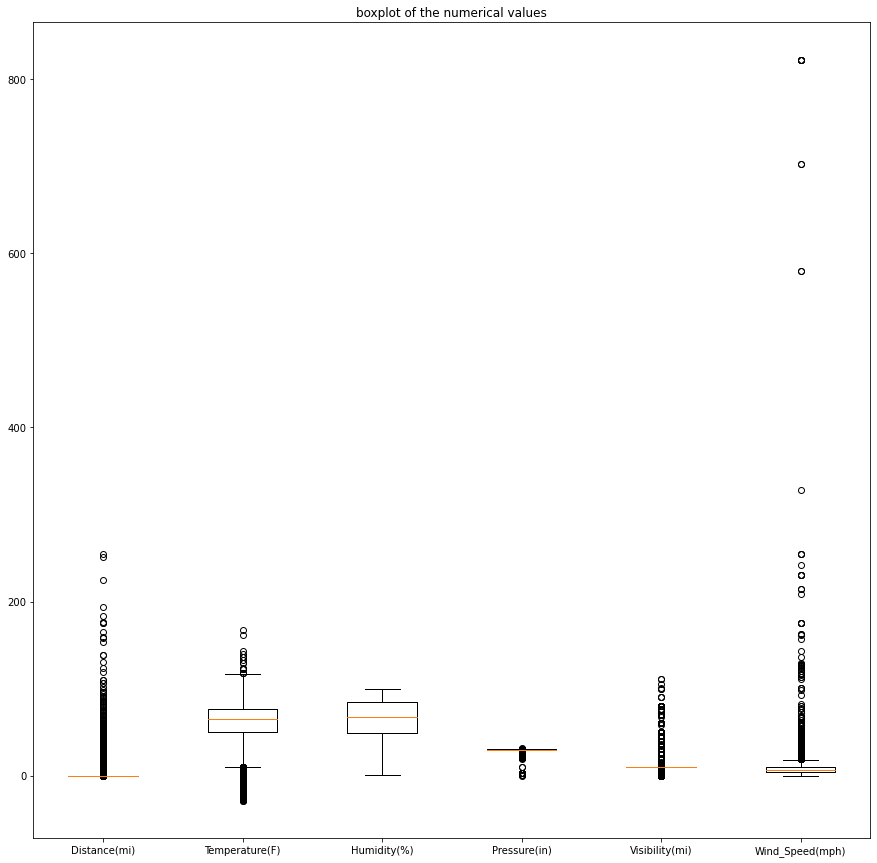

In [5]:
plt.figure(figsize=(15,15))
plt.title('boxplot of the numerical values')
plt.boxplot(df_Num.values,labels=numericData_lst);

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_Num)

dfNum_scaled = scaler.transform(df_Num)

dfNum_scaled

array([[-0.11994531, -1.42291401,  1.56738224, -0.13824362,  0.31079673,
        -0.922257  ],
       [-0.11994531, -1.47082167,  1.38738418, -0.17843113, -0.05393562,
        -0.70706232],
       [-0.11994531, -1.42291401,  1.07238756, -0.16503529, -1.14813269,
        -0.922257  ],
       ...,
       [-0.12660349,  2.10096072, -2.21257709, -0.0578686 , -1.14813269,
        -0.47230448],
       [-0.12660349,  1.34508427, -1.17758823, -0.12484778,  0.31079673,
        -0.922257  ],
       [-0.12660349,  1.43025345, -1.13258871,  0.00911059,  0.31079673,
        -0.922257  ]])

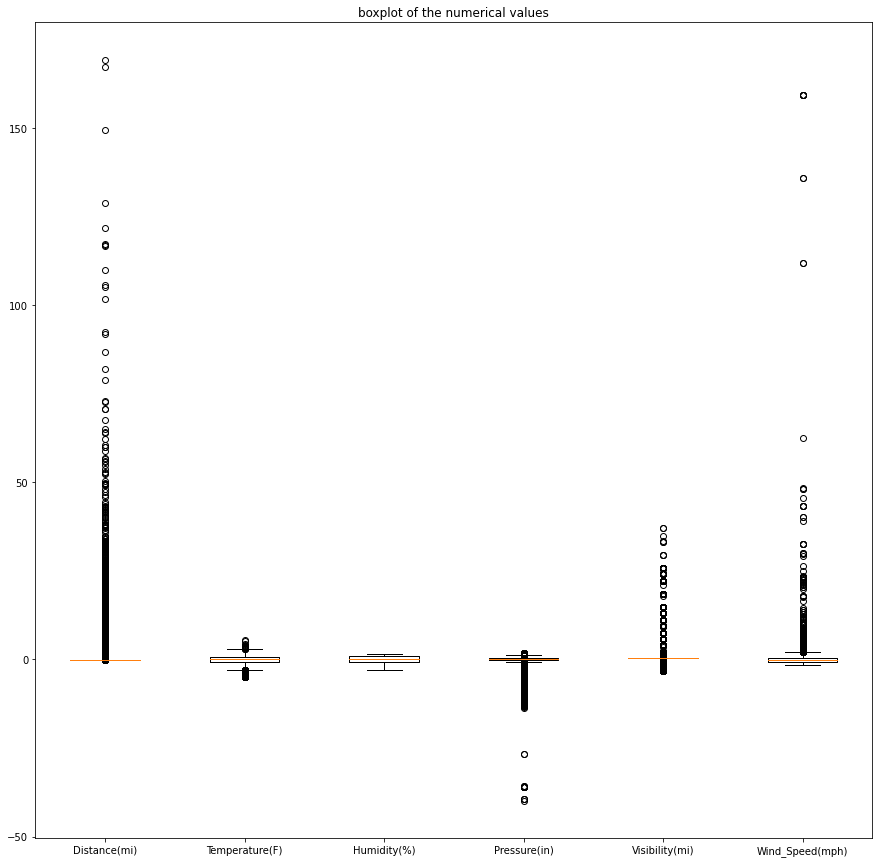

In [14]:
plt.figure(figsize=(15,15))
plt.title('boxplot of the numerical values')
plt.boxplot(dfNum_scaled,labels=numericData_lst);

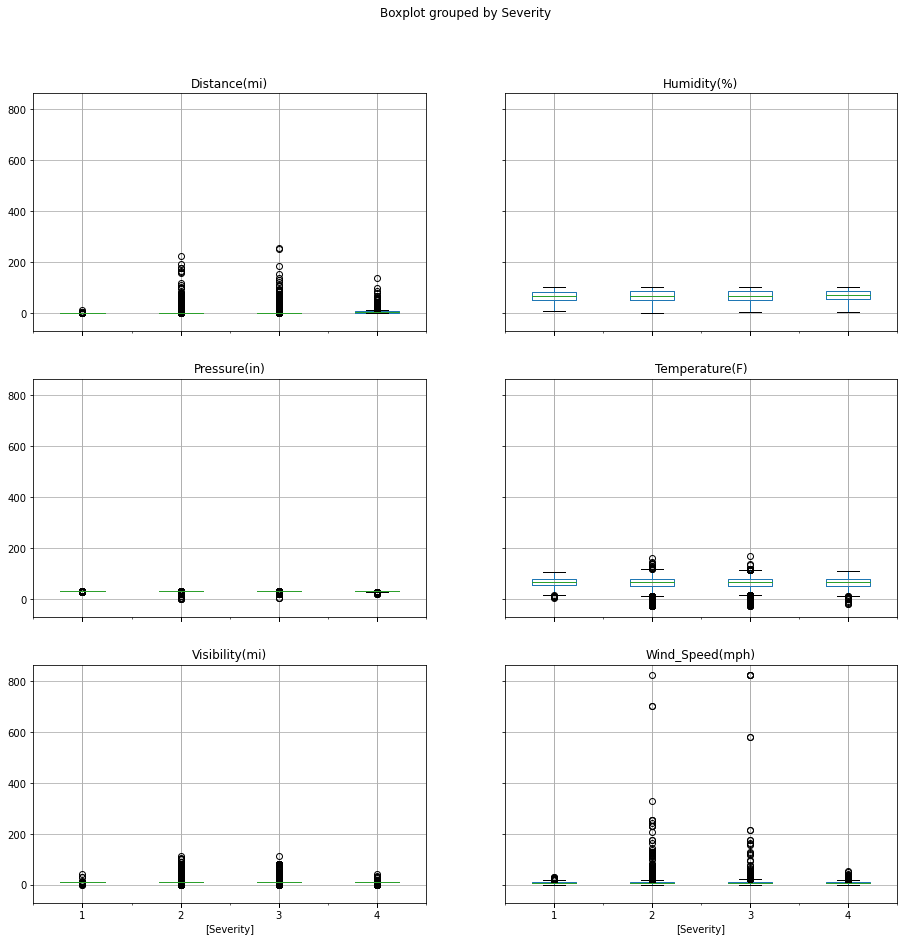

In [7]:
boxplot = df_Num.boxplot(by='Severity',figsize= (15,15))

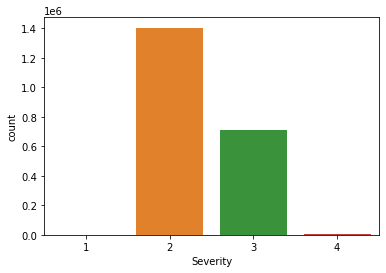

In [8]:
sns.countplot(df['Severity'])

In [9]:
gSeverity = df.groupby(['Severity']).agg(['count'])
gSeverity

,Unnamed: 0,Source,TMC,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Junction,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
Severity,,,,,,,,,,,,,,,,,,,,,
1,902,902,902,902,902,902,902,902,902,902,...,902,902,902,902,902,902,902,902,902,902
2,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160,...,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160,1403160
3,706907,706907,706907,706907,706907,706907,706907,706907,706907,706907,...,706907,706907,706907,706907,706907,706907,706907,706907,706907,706907
4,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345,...,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('US_Accidents_June20_CLEANED.csv')

df.head()

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Junction,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,False,True,Night,Night,Day,Day
1,3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,Night,Day,Day,Day
2,4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,False,True,Day,Day,Day,Day
3,5,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,False,Day,Day,Day,Day
4,6,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [4]:
td='durationt'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m')) 

In [5]:
df[['durationt']].head()

,durationt
0,30.0
1,30.0
2,30.0
3,30.0
4,30.0


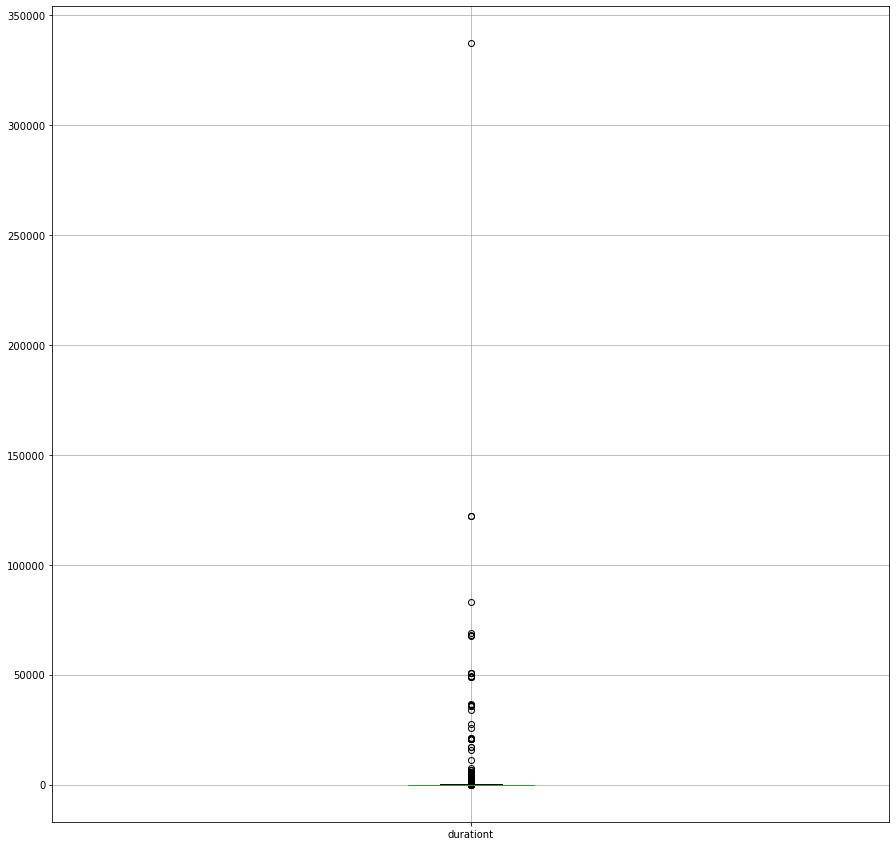

In [25]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

In [6]:
df.head()

,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
0,2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,True,Night,Night,Day,Day,30.0
1,3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,Night,Day,Day,Day,30.0
2,4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,True,Day,Day,Day,Day,30.0
3,5,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,False,Day,Day,Day,Day,30.0
4,6,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,...,False,False,False,False,False,Day,Day,Day,Day,30.0


In [7]:
df.sort_values(by=['Time_Duration(min)'],ascending=False) 

,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
314121,391252,MapQuest,406.0,2,2016-11-08 01:00:00,2017-06-30 01:00:00,32.763680,-97.318680,0.01,Entry ramp closed on Gilvin St for I-35W South...,...,False,False,False,False,False,Night,Night,Night,Night,336960.0
699807,802579,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 07:09:00,40.825241,-95.806221,1.75,Entry ramp to I-29 Northbound from 155th St We...,...,False,False,False,False,False,Day,Day,Day,Day,122030.0
699806,802578,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 06:00:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St So...,...,False,False,False,False,False,Day,Day,Day,Day,121961.0
353546,436512,MapQuest,406.0,3,2017-05-03 11:17:26,2017-06-30 03:00:00,46.887161,-120.429115,4.33,Entry ramp closed and intermittent lane closur...,...,False,False,False,False,False,Day,Day,Day,Day,83023.0
846284,952674,MapQuest,406.0,3,2019-07-14 13:19:10,2019-08-31 10:30:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St cl...,...,False,False,False,False,False,Day,Day,Day,Day,68951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336401,1497823,MapQuest,201.0,3,2018-11-04 01:30:41,2018-11-04 01:00:17,34.172119,-118.467529,0.00,#4 lane blocked due to accident on I-405 North...,...,False,False,False,False,True,Night,Night,Night,Night,-30.0
757253,861495,MapQuest,201.0,2,2019-11-03 01:43:50,2019-11-03 01:13:31,37.730671,-121.747063,0.00,Accident on Raymond Rd at Dagnino Rd.,...,False,False,False,False,False,Night,Night,Night,Night,-30.0
246649,309387,MapQuest,201.0,2,2016-11-06 01:51:04,2016-11-06 01:20:49,47.608002,-122.296280,0.01,Accident on Martin Luther King Jr Way at Cherr...,...,False,False,False,False,True,Night,Night,Night,Night,-30.0
246650,309388,MapQuest,201.0,2,2016-11-06 01:51:49,2016-11-06 01:21:35,47.530354,-122.270004,0.01,Accident on Rainier Ave at Elmgrove St.,...,False,False,False,False,False,Night,Night,Night,Night,-30.0


In [20]:
df.query(' durationt > 100000')

,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),durationt
314121,391252,MapQuest,406.0,2,2016-11-08 01:00:00,2017-06-30 01:00:00,32.763680,-97.318680,0.01,Entry ramp closed on Gilvin St for I-35W South...,...,False,False,False,False,Night,Night,Night,Night,336960.0,336960.0
699806,802578,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 06:00:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St So...,...,False,False,False,False,Day,Day,Day,Day,121961.0,121961.0
699807,802579,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 07:09:00,40.825241,-95.806221,1.75,Entry ramp to I-29 Northbound from 155th St We...,...,False,False,False,False,Day,Day,Day,Day,122030.0,122030.0


In [22]:
df[['durationt']].describe()

,durationt
count,2.117314e+06
mean,5.304824e+01
std,3.104531e+02
min,-3.100000e+01
25%,3.000000e+01
50%,4.500000e+01
75%,6.000000e+01
max,3.369600e+05


,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),durationt
30,32,MapQuest,201.0,3,2016-02-08 18:24:00,2016-02-08 21:00:00,40.042725,-82.997307,0.01,Left lane blocked due to accident on I-71 Sout...,...,False,False,False,False,Night,Day,Day,Day,156.0,156.0
32,35,MapQuest,201.0,2,2016-02-08 20:43:00,2016-02-08 23:00:00,40.006477,-83.030991,1.09,Right lane blocked due to accident on OH-315 O...,...,False,False,False,False,Night,Night,Night,Night,137.0,137.0
69,72,MapQuest,241.0,3,2016-02-10 06:06:00,2016-02-10 09:06:00,39.973797,-83.022285,0.01,One lane blocked due to accident on OH-315 Ole...,...,False,False,False,False,Night,Night,Night,Day,180.0,180.0
81,84,MapQuest,201.0,3,2016-02-10 17:10:00,2016-02-10 23:59:00,41.040714,-81.613144,0.01,Left lane blocked due to accident on I-76 West...,...,False,False,False,False,Day,Day,Day,Day,409.0,409.0
82,85,MapQuest,201.0,3,2016-02-10 18:09:00,2016-02-10 23:59:00,41.083679,-81.579002,1.28,Left lane blocked due to accident on I-77 Nort...,...,False,False,False,False,Night,Day,Day,Day,350.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116451,2477752,MapQuest,201.0,2,2017-08-30 05:43:14,2017-08-30 12:57:51,30.141960,-92.096291,0.00,Accident on Fair Grounds Dr both ways from Lad...,...,False,False,False,False,Night,Night,Night,Day,435.0,435.0
2116880,2478227,MapQuest,236.0,3,2017-08-30 11:02:45,2017-08-30 12:17:45,32.463009,-99.953575,0.00,Heavy traffic due to accident on I-20 Westboun...,...,False,False,False,False,Day,Day,Day,Day,75.0,75.0
2116962,2478338,MapQuest,201.0,2,2017-08-30 10:58:17,2017-08-30 12:16:00,32.295094,-110.960991,0.00,Accident on River Rd at 1st Ave.,...,False,False,False,True,Day,Day,Day,Day,78.0,78.0
2116963,2478339,MapQuest,201.0,2,2017-08-30 11:06:55,2017-08-30 12:21:45,32.345200,-110.976295,0.00,Accident on AZ-77 Oracle Rd at Suffolk Dr.,...,False,False,False,True,Day,Day,Day,Day,75.0,75.0


In [27]:
data = df[['durationt']].values
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

In [28]:
upper_whisker

105.0

In [44]:
lower_whisker

9.5

In [29]:
upper_quartile

60.0

In [53]:
bigoteSup = df.query(' durationt > 105.0')

In [55]:
bigoteSup.sort_values(by=['Time_Duration(min)'],ascending=False).head(20)

,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),durationt
314121,391252,MapQuest,406.0,2,2016-11-08 01:00:00,2017-06-30 01:00:00,32.763680,-97.318680,0.01,Entry ramp closed on Gilvin St for I-35W South...,...,False,False,False,False,Night,Night,Night,Night,336960.0,336960.0
699807,802579,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 07:09:00,40.825241,-95.806221,1.75,Entry ramp to I-29 Northbound from 155th St We...,...,False,False,False,False,Day,Day,Day,Day,122030.0,122030.0
699806,802578,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 06:00:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St So...,...,False,False,False,False,Day,Day,Day,Day,121961.0,121961.0
353546,436512,MapQuest,406.0,3,2017-05-03 11:17:26,2017-06-30 03:00:00,46.887161,-120.429115,4.33,Entry ramp closed and intermittent lane closur...,...,False,False,False,False,Day,Day,Day,Day,83023.0,83023.0
846284,952674,MapQuest,406.0,3,2019-07-14 13:19:10,2019-08-31 10:30:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St cl...,...,False,False,False,False,Day,Day,Day,Day,68951.0,68951.0
699805,802577,MapQuest,406.0,3,2019-08-21 04:32:56,2019-10-07 07:01:00,40.600689,-95.680099,1.86,Entry ramp to I-29 Southbound from 310th St Ea...,...,False,False,False,False,Night,Night,Night,Night,67828.0,67828.0
699804,802576,MapQuest,406.0,3,2019-08-21 04:32:56,2019-10-07 06:00:00,40.600681,-95.675400,1.83,Entry ramp to I-29 Northbound from 310th St Ea...,...,False,False,False,False,Night,Night,Night,Night,67767.0,67767.0
877772,984883,MapQuest,406.0,3,2019-07-14 13:19:10,2019-08-18 18:54:00,40.889641,-95.798630,1.67,Entry ramp to I-29 Northbound from Waubonsie A...,...,False,False,False,False,Day,Day,Day,Day,50735.0,50735.0
735407,839146,MapQuest,406.0,3,2019-09-19 03:36:55,2019-10-24 07:45:00,40.889641,-95.798630,1.67,Entry ramp to I-29 Northbound from Waubonsie A...,...,False,False,False,False,Night,Night,Night,Night,50648.0,50648.0
735406,839145,MapQuest,406.0,3,2019-09-19 03:36:55,2019-10-24 07:45:00,40.884850,-95.800362,1.63,Entry ramp to I-29 Southbound from Waubonsie A...,...,False,False,False,False,Night,Night,Night,Night,50648.0,50648.0


In [52]:
bigoteInf = df.query(' durationt < 9.5')

In [49]:
134033 /2117314

0.06330331731618456

In [51]:
bigoteInf.sort_values(by=['Time_Duration(min)']).head(20)

,Unnamed: 0,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min),durationt
756791,861024,MapQuest,201.0,2,2019-11-03 01:47:49,2019-11-03 01:17:08,43.091412,-75.747284,0.00,Accident on I-90 Eastbound at Exit 34 NY-13 Pe...,...,False,False,False,False,Night,Night,Night,Night,-31.0,-31.0
246649,309387,MapQuest,201.0,2,2016-11-06 01:51:04,2016-11-06 01:20:49,47.608002,-122.296280,0.01,Accident on Martin Luther King Jr Way at Cherr...,...,False,False,False,True,Night,Night,Night,Night,-30.0,-30.0
246650,309388,MapQuest,201.0,2,2016-11-06 01:51:49,2016-11-06 01:21:35,47.530354,-122.270004,0.01,Accident on Rainier Ave at Elmgrove St.,...,False,False,False,False,Night,Night,Night,Night,-30.0,-30.0
757253,861495,MapQuest,201.0,2,2019-11-03 01:43:50,2019-11-03 01:13:31,37.730671,-121.747063,0.00,Accident on Raymond Rd at Dagnino Rd.,...,False,False,False,False,Night,Night,Night,Night,-30.0,-30.0
1336401,1497823,MapQuest,201.0,3,2018-11-04 01:30:41,2018-11-04 01:00:17,34.172119,-118.467529,0.00,#4 lane blocked due to accident on I-405 North...,...,False,False,False,True,Night,Night,Night,Night,-30.0,-30.0
757234,861475,MapQuest,201.0,3,2019-11-03 01:20:44,2019-11-03 01:06:33,45.635433,-122.663467,0.00,Center lane closed due to accident on I-5 Nort...,...,False,False,False,False,Night,Night,Night,Night,-14.0,-14.0
756755,860988,MapQuest,201.0,2,2019-11-03 01:25:16,2019-11-03 01:12:56,42.793083,-78.818367,6.21,Accident on I-90 Eastbound from Exit 57 NY-75 ...,...,False,False,False,False,Night,Night,Night,Night,-12.0,-12.0
53543,69719,MapQuest,201.0,3,2016-11-06 01:38:13,2016-11-06 01:37:57,34.032963,-118.435738,0.01,Accident on I-10 Eastbound at Exits 3A 3B I-405.,...,False,False,False,False,Night,Night,Night,Night,-0.0,-0.0
53544,69721,MapQuest,201.0,3,2016-11-06 01:35:47,2016-11-06 01:35:31,33.804443,-118.207527,0.01,Accident on I-710 Northbound at Exits 3A 3B Wi...,...,False,False,False,False,Night,Night,Night,Night,-0.0,-0.0
756808,861041,MapQuest,201.0,2,2019-11-03 01:34:54,2019-11-03 01:34:31,41.043110,-73.835861,0.00,Accident on I-87 Northbound at Exit 7A Saw Mil...,...,False,False,False,False,Night,Night,Night,Night,-0.0,-0.0


In [32]:
data = df[['Temperature(F)']].values
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

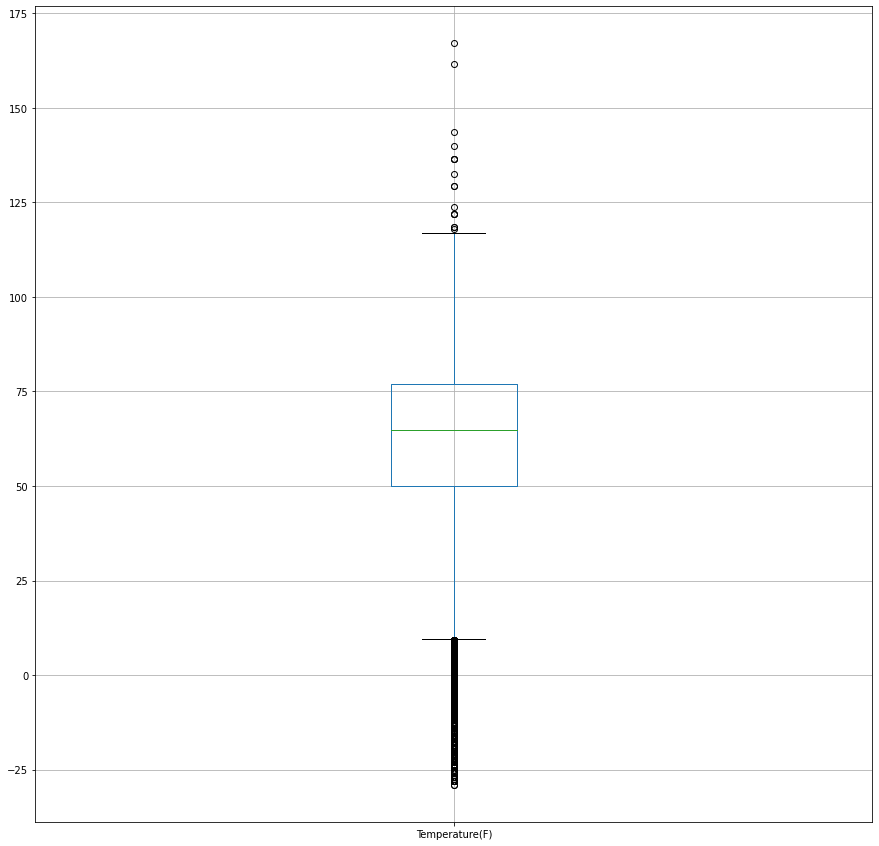

In [33]:
boxplot = df[['Temperature(F)']].boxplot(figsize= (15,15))

In [34]:
df[['Temperature(F)']].describe()

,Temperature(F)
count,2.117314e+06
mean,6.273106e+01
std,1.878614e+01
min,-2.900000e+01
25%,5.000000e+01
50%,6.490000e+01
75%,7.700000e+01
max,1.670000e+02


In [36]:
upper_whisker

117.0

In [40]:
df.sort_values(by=['Temperature(F)'],ascending=False).iloc[0]

Unnamed: 0                                                          504594
Source                                                            MapQuest
TMC                                                                    339
Severity                                                                 3
Start_Time                                             2017-07-21 11:13:24
End_Time                                               2017-07-21 11:42:58
Start_Lat                                                          41.5482
Start_Lng                                                         -73.0676
Distance(mi)                                                             0
Description              Slow traffic and right lane blocked due to jac...
Street                                                              I-84 W
City                                                             Waterbury
County                                                           New Haven
State                    

1: 0,2.30
2: 2.30, 3,15
3: 3.15,8
4: 18

In [13]:
criteria = [df['durationt'].between(0, 2.30), df['durationt'].between(2.30, 3.15), df['durationt'].between(3.15, 8), df['durationt'].between(8, 18)]
values = [1, 2, 3, 4]

df['newSeverity'] = np.select(criteria, values, 0)

In [19]:
df.query('newSeverity == 0')

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,durationt,newSeverity
0,2,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,True,Night,Night,Day,Day,30.0,0
1,3,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,Night,Day,Day,Day,30.0,0
2,4,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,True,Day,Day,Day,Day,30.0,0
3,5,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,...,False,False,False,False,Day,Day,Day,Day,30.0,0
4,6,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,...,False,False,False,False,Day,Day,Day,Day,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117309,2478813,MapQuest,201.0,3,2017-08-30 18:41:30,2017-08-30 19:11:07,34.495808,-118.623932,0.00,Accident on I-5 Southbound at Forest Rte-7N09 ...,...,False,False,False,False,Day,Day,Day,Day,30.0,0
2117310,2478814,MapQuest,201.0,3,2017-08-30 18:59:02,2017-08-30 19:27:57,34.031322,-118.433723,0.00,Left lane closed due to accident on I-10 at Na...,...,False,False,False,False,Day,Day,Day,Day,29.0,0
2117311,2478815,MapQuest,201.0,3,2017-08-30 18:57:52,2017-08-30 19:26:11,34.106785,-117.369102,0.00,Accident on Olive Ave at CA-66 Foothill Blvd.,...,False,False,False,False,Day,Day,Day,Day,28.0,0
2117312,2478816,MapQuest,201.0,3,2017-08-30 19:49:01,2017-08-30 20:18:00,33.924686,-118.103981,0.00,#1 lane blocked due to accident on I-605 North...,...,False,False,False,False,Night,Night,Day,Day,29.0,0


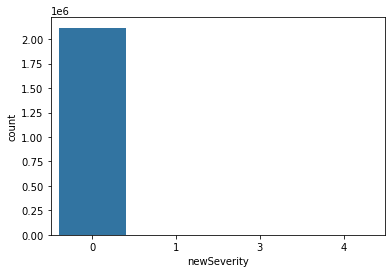

In [18]:
sns.countplot(df['newSeverity'])

In [21]:
gSeverity = df.groupby(['newSeverity']).agg(['count'])
gSeverity

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,durationt
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
newSeverity,,,,,,,,,,,,,,,,,,,,,
0,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172,...,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172,2117172
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137


In [22]:
105.0 / 4

26.25

In [24]:
a = 0
for i in range(4):
    a+=26.15
    print(a)
    

26.15
52.3
78.44999999999999
104.6


In [26]:
criteria = [df['durationt'].between(0, 26.15), df['durationt'].between(26.15, 52.3), df['durationt'].between(52.3, 78.5), df['durationt'].between(78.5, 104.6)]
values = [1, 2, 3, 4]

df['newSeverity'] = np.select(criteria, values, 0)

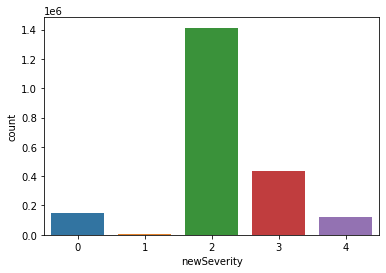

In [27]:
sns.countplot(df['newSeverity'])

In [64]:
gSeverity = df.groupby(['newSeverity']).agg(['count'])
gSeverity

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,durationt
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
newSeverity,,,,,,,,,,,,,,,,,,,,,
1,912281,912281,912281,912281,912281,912281,912281,912281,912281,912281,...,912281,912281,912281,912281,912281,912281,912281,912281,912281,912281
2,138657,138657,138657,138657,138657,138657,138657,138657,138657,138657,...,138657,138657,138657,138657,138657,138657,138657,138657,138657,138657
3,617493,617493,617493,617493,617493,617493,617493,617493,617493,617493,...,617493,617493,617493,617493,617493,617493,617493,617493,617493,617493
4,314843,314843,314843,314843,314843,314843,314843,314843,314843,314843,...,314843,314843,314843,314843,314843,314843,314843,314843,314843,314843


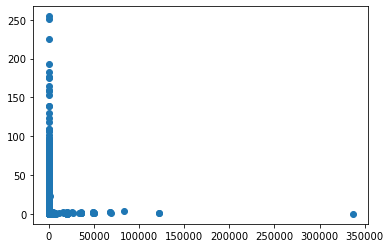

In [8]:
plt.scatter(df['durationt'], df['Distance(mi)'])
plt.show()

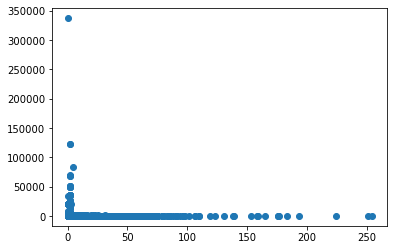

In [9]:
plt.scatter(df['Distance(mi)'], df['durationt'])
plt.show()

In [41]:
indices = df.query('durationt > 105.0').index.append(df.query('durationt < 0').index)
indices.shape

(7,)

In [30]:
134033/2117314

0.06330331731618456

In [42]:
df.drop(indices, inplace=True)

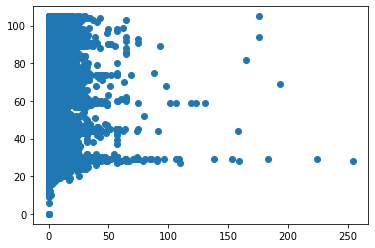

In [43]:
plt.scatter(df['Distance(mi)'], df['durationt'])
plt.show()

In [44]:
df[['durationt']].describe()

,durationt
count,1.983274e+06
mean,4.512361e+01
std,1.873004e+01
min,-0.000000e+00
25%,3.000000e+01
50%,4.400000e+01
75%,6.000000e+01
max,1.050000e+02


In [89]:
outliers =  df.query('durationt > 105').copy()
outliers.sortby()

(134033, 34)

In [92]:
outliers.sort_values(by=['durationt'], ascending = False)

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,durationt
314121,391252,MapQuest,406.0,2,2016-11-08 01:00:00,2017-06-30 01:00:00,32.763680,-97.318680,0.01,Entry ramp closed on Gilvin St for I-35W South...,...,False,False,False,False,False,Night,Night,Night,Night,336960.0
699807,802579,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 07:09:00,40.825241,-95.806221,1.75,Entry ramp to I-29 Northbound from 155th St We...,...,False,False,False,False,False,Day,Day,Day,Day,122030.0
699806,802578,MapQuest,406.0,3,2019-07-14 13:19:10,2019-10-07 06:00:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St So...,...,False,False,False,False,False,Day,Day,Day,Day,121961.0
353546,436512,MapQuest,406.0,3,2017-05-03 11:17:26,2017-06-30 03:00:00,46.887161,-120.429115,4.33,Entry ramp closed and intermittent lane closur...,...,False,False,False,False,False,Day,Day,Day,Day,83023.0
846284,952674,MapQuest,406.0,3,2019-07-14 13:19:10,2019-08-31 10:30:00,40.821640,-95.807564,1.75,Entry ramp to I-29 Southbound from 155th St cl...,...,False,False,False,False,False,Day,Day,Day,Day,68951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572218,672136,MapQuest,241.0,2,2020-01-22 15:25:38,2020-01-22 17:12:04,33.398354,-80.340691,0.00,Lane blocked due to accident on SC-6 Old Numbe...,...,False,False,False,False,False,Day,Day,Day,Day,106.0
679019,781332,MapQuest,201.0,2,2019-12-13 21:41:37,2019-12-13 23:27:27,30.400780,-91.175240,0.00,Accident on LA-42 Burbank Dr at Boyd Dr.,...,False,False,False,False,False,Night,Night,Night,Night,106.0
1124886,1239726,MapQuest,201.0,2,2019-04-17 09:39:21,2019-04-17 11:25:45,29.560946,-95.115601,0.00,Accident on Bay Area Blvd at Saturn Ln.,...,False,False,False,False,True,Day,Day,Day,Day,106.0
454680,551660,MapQuest,201.0,2,2020-06-23 16:16:51,2020-06-23 18:03:20,40.929455,-73.848335,0.00,Center lane blocked due to accident on Bronx R...,...,False,False,False,False,False,Day,Day,Day,Day,106.0


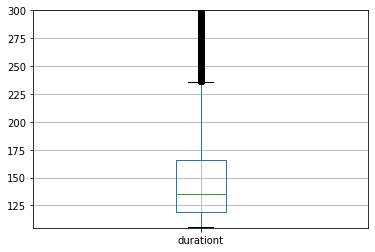

In [93]:
plt.ylim(105,300)
outliers[['durationt']].boxplot(figsize= (15,15))

In [94]:
data = outliers[['durationt']].values
median = np.median(data)
upper_quartile = np.percentile(data, 75)
lower_quartile = np.percentile(data, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

In [95]:
upper_whisker

236.0

In [96]:
outliers.query('durationt > 236.0')

,OldIndex,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,durationt
81,84,MapQuest,201.0,3,2016-02-10 17:10:00,2016-02-10 23:59:00,41.040714,-81.613144,0.01,Left lane blocked due to accident on I-76 West...,...,False,False,False,False,False,Day,Day,Day,Day,409.0
82,85,MapQuest,201.0,3,2016-02-10 18:09:00,2016-02-10 23:59:00,41.083679,-81.579002,1.28,Left lane blocked due to accident on I-77 Nort...,...,False,False,False,False,False,Night,Day,Day,Day,350.0
87,91,MapQuest,201.0,3,2016-02-11 06:29:00,2016-02-11 21:00:00,41.420818,-81.694008,0.01,Accident on I-480 Eastbound at Exit 16 OH-94 S...,...,False,False,False,False,False,Night,Night,Day,Day,871.0
126,135,MapQuest,201.0,3,2016-02-14 10:13:00,2016-02-14 23:59:00,39.981709,-82.984360,0.01,Left lane closed due to accident on I-71 Inner...,...,False,False,False,False,False,Day,Day,Day,Day,826.0
193,204,MapQuest,406.0,3,2016-02-16 16:47:00,2016-02-16 21:00:00,40.016014,-82.903442,0.01,Entry ramp closed due to accident on I-270 Out...,...,False,False,False,False,False,Day,Day,Day,Day,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097620,2454285,MapQuest,201.0,3,2017-08-19 14:17:47,2017-08-20 00:30:24,40.770512,-73.917542,0.00,Accident on I-278 Robert F Kennedy Brg Southbo...,...,True,False,False,False,True,Day,Day,Day,Day,613.0
2099580,2456843,MapQuest,241.0,3,2017-08-21 12:24:50,2017-08-21 17:10:48,41.499653,-94.213707,0.00,Lane blocked and queueing traffic due to accid...,...,False,False,False,False,False,Day,Day,Day,Day,286.0
2109574,2469293,MapQuest,201.0,2,2017-08-25 12:06:02,2017-08-25 16:50:43,41.346027,-120.921799,0.00,Accident on CA-299 CA-139 Westbound at CA-299 ...,...,False,False,False,False,False,Day,Day,Day,Day,285.0
2112454,2472671,MapQuest,406.0,2,2017-08-28 11:44:40,2017-08-29 12:13:00,30.138018,-95.293579,1.05,Entry ramp to Grand Pkwy Westbound from FM 131...,...,False,False,False,False,False,Day,Day,Day,Day,1468.0


In [97]:
outliers[['durationt']].describe()

,durationt
count,134033.000000
mean,170.312386
std,1225.833519
min,106.000000
25%,119.000000
50%,135.000000
75%,166.000000
max,336960.000000


In [75]:
criteria = [df['durationt'].between(0, 29), df['durationt'].between(30, 44.4), df['durationt'].between(45, 60), df['durationt'].between(61, 105)]
values = [1, 2, 3, 4]

df['newSeverity'] = np.select(criteria, values, 0)

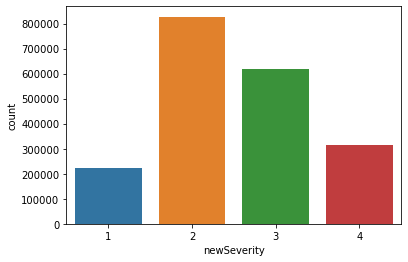

In [76]:
sns.countplot(df['newSeverity'])

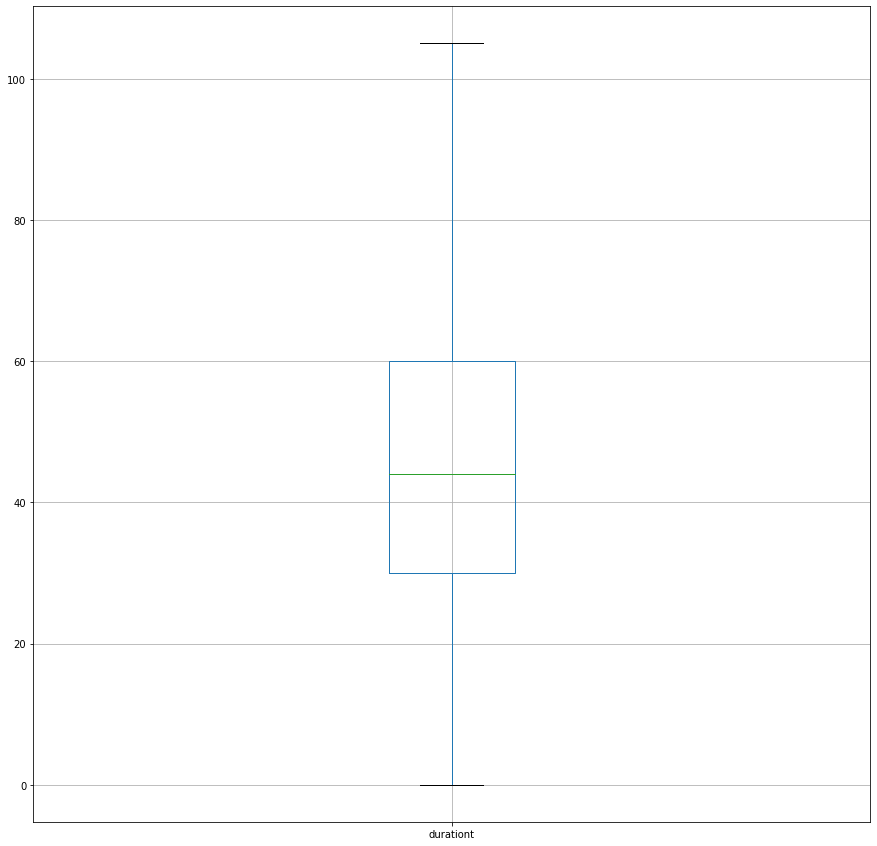

In [77]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

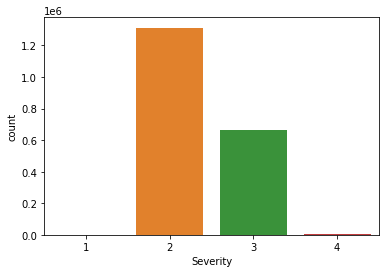

In [50]:
sns.countplot(df['Severity'])

In [51]:
df.shape

(1983274, 35)

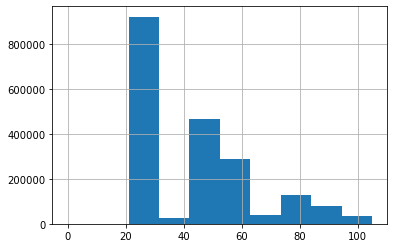

In [62]:
df['durationt'].hist()

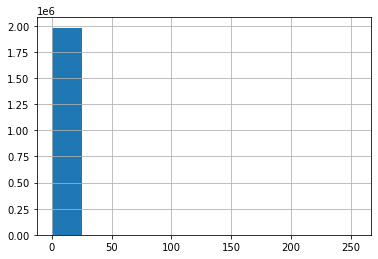

In [63]:
 df['Distance(mi)'].hist()

In [65]:
numericData_lst=['Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','durationt']
df_Num=df[numericData_lst].copy()

C:\Users\josrenca\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\josrenca\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


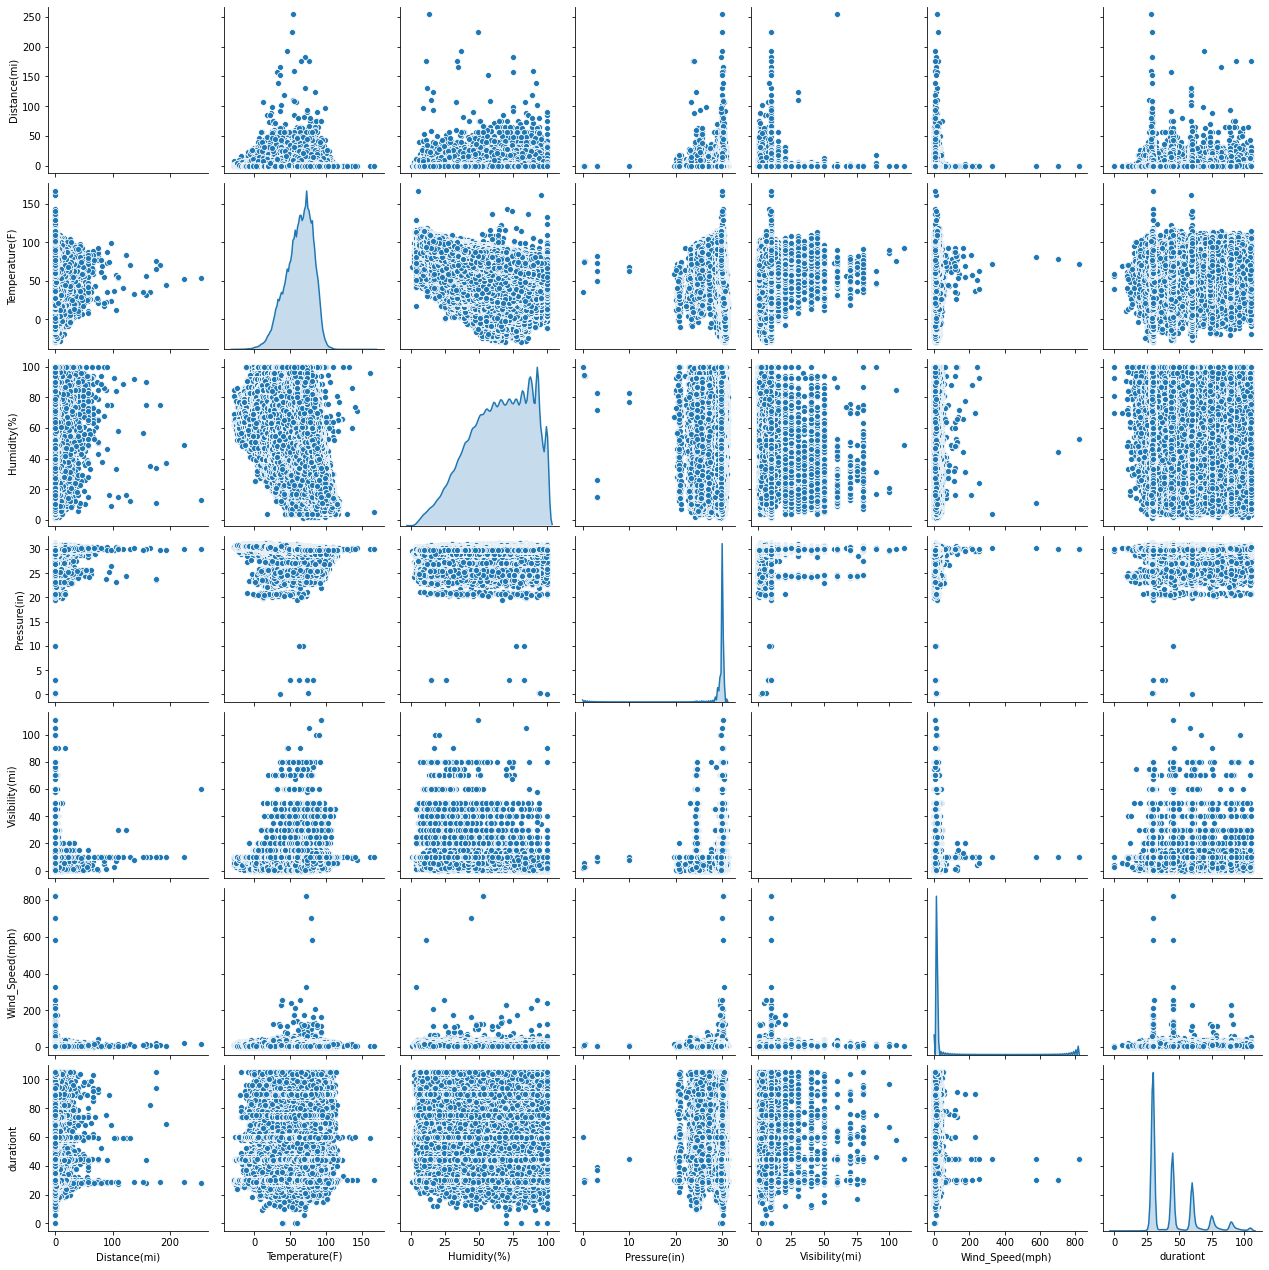

In [66]:
sns.pairplot(df_Num, diag_kind="kde")
plt.show()

In [102]:
indices = df.query('durationt > 236.0').index.append(df.query('durationt < 0').index)
indices.shape

(10066,)

In [103]:
df.drop(indices, inplace=True)

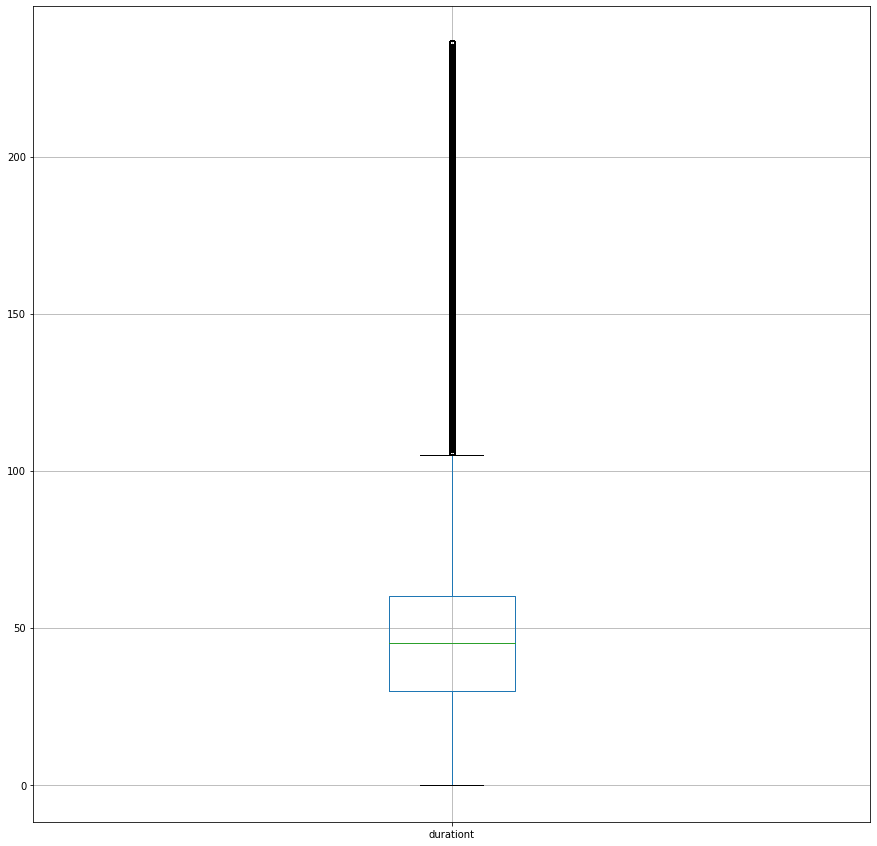

In [104]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

In [105]:
df[['durationt']].describe()

,durationt
count,2.107248e+06
mean,5.067451e+01
std,2.963493e+01
min,-0.000000e+00
25%,3.000000e+01
50%,4.500000e+01
75%,6.000000e+01
max,2.360000e+02


In [109]:
indices = df.query('durationt < 236.0').index
indices.shape

(2107132,)

In [110]:
df.drop(indices, inplace=True)

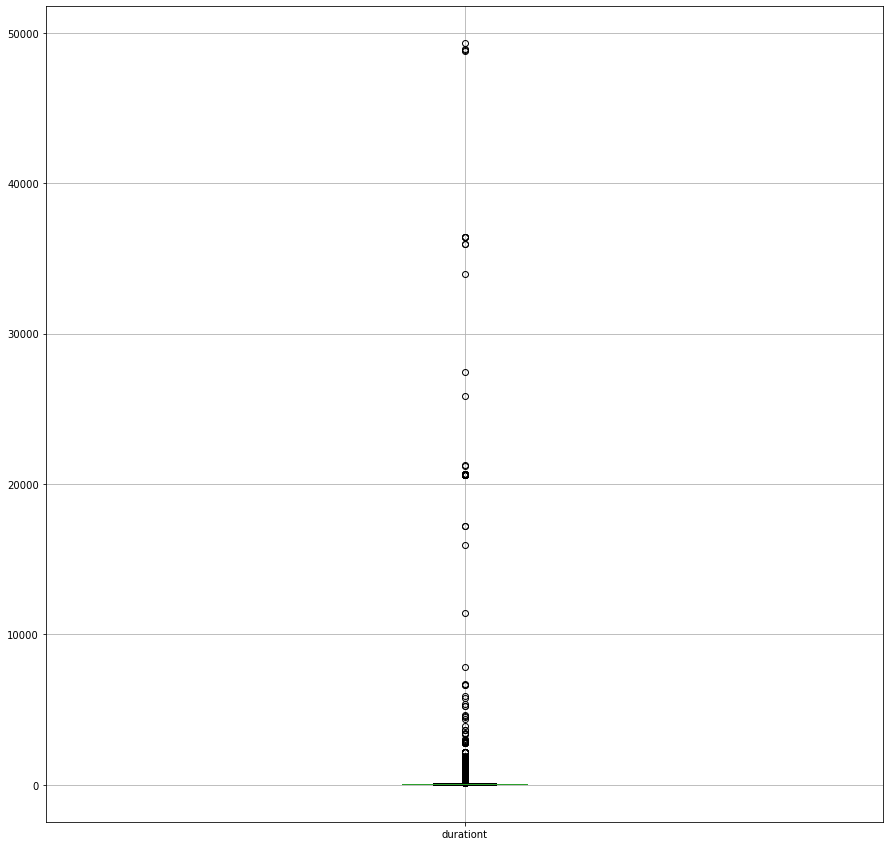

In [11]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

In [118]:
df[['durationt']].describe()

,durationt
count,10182.000000
mean,546.574052
std,4429.217692
min,236.000000
25%,256.000000
50%,288.000000
75%,357.000000
max,336960.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CD26B3DF0>]],
      dtype=object)

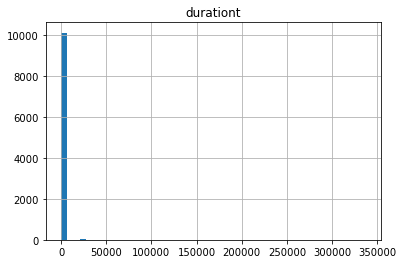

In [122]:
df[['durationt']].hist(bins=50)

In [7]:
indices = df.query('durationt < 0').index.append(df.query('durationt > 50000').index)
indices.shape

(17,)

In [8]:
df.drop(indices, inplace=True)


In [9]:
df[['durationt']].describe()

,durationt
count,2.117297e+06
mean,5.256674e+01
std,1.235589e+02
min,-0.000000e+00
25%,3.000000e+01
50%,4.500000e+01
75%,6.000000e+01
max,4.929600e+04


In [10]:
criteria = [df['durationt'].between(0, 29), df['durationt'].between(30, 44.4), df['durationt'].between(45, 60), df['durationt'].between(61, 50000)]
values = [1, 2, 3, 4]

df['newSeverity'] = np.select(criteria, values, 0)

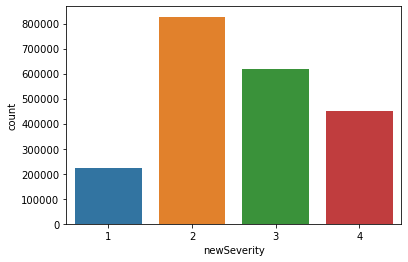

In [13]:
sns.countplot(df['newSeverity'])

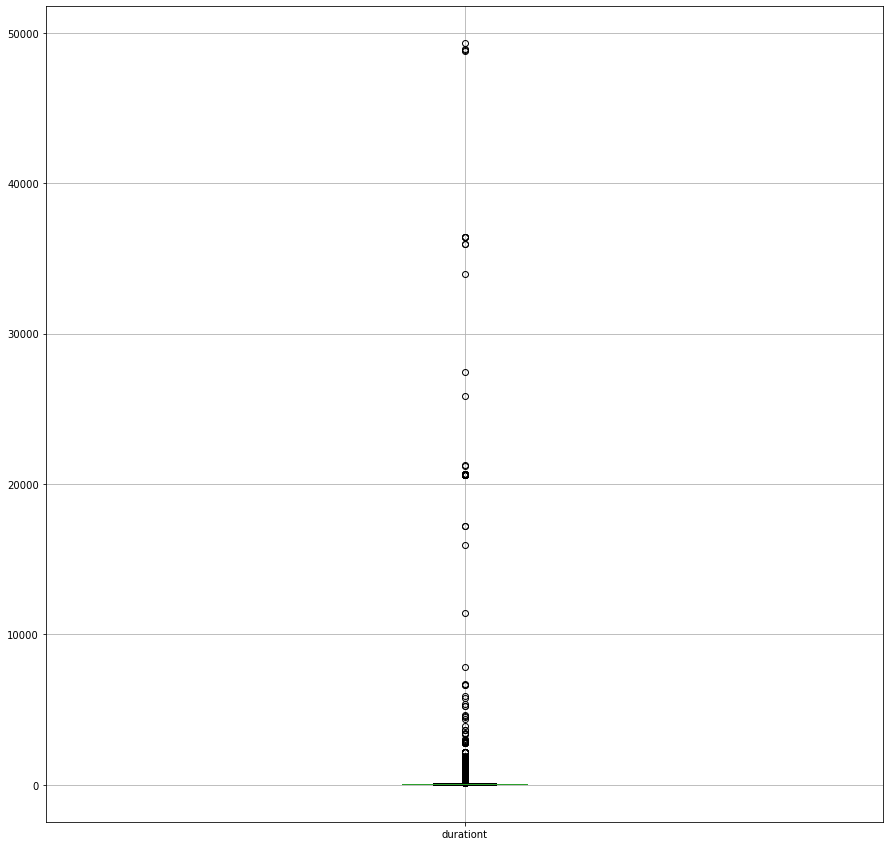

In [12]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

In [14]:
df.to_csv(r'US_Accidents_June20_CLEANED2.csv', index = True, header=True)

In [15]:
df.shape

(2117297, 35)